# Stack Overflow

## Introduction 

In this assignment, we will look at some posts on Stack Overflow during the year of 2015 and measure the similarity of users by looking at the types of questions they answer. Do not delete the output of your code cells. This assignment is to be completed **INDIVIDUALLY** and it is due on **February 10 at 2:00 PM**. No late submission will be accepted. 

Please update the README with your BU username.

## Step 0. Preparation

Before we start working on the notebook, let's make sure that everything is setup properly. You should have downloaded and installed
* [Anaconda](https://store.continuum.io/cshop/anaconda/)
* [Git](http://git-scm.com/downloads)

If you are working from the undergraduate lab (on a linux machine) these are both installed, but you need to follow the instructions [from here](https://github.com/evimaria/CS506-Spring2007/blob/master/02A-Getting-Started.ipynb).



## Step 1. Getting the data

Let's make a sample request to retrieve some questions posted on Stack Exchange on the first day of 2015. Documentation of the Stack Exchange API can be found [here](https://api.stackexchange.com/docs).

In [75]:
import requests
from datetime import datetime

start_time = 1420070400 # 01-01-2015 at 00:00:00
end_time   = 1420156800 # 01-02-2015 at 00:00:00

response = requests.get("https://api.stackexchange.com/2.2/questions?pagesize=100" +
                        "&fromdate=" + str(start_time) + "&todate=" + str(end_time) +
                        "&order=asc&sort=creation&site=stackoverflow")
print(response)
    

<Response [200]>


All dates in the Stack Exchange API are in [unix epoch time](https://en.wikipedia.org/wiki/Unix_time). The format for the request string is specified [here](https://api.stackexchange.com/docs/questions).

We can try to print the response that Stack Exchange returns.

In [76]:
print(response.text)

{"items":[{"tags":["php","mysql","arrays","mysqli"],"owner":{"reputation":167,"user_id":3210431,"user_type":"registered","accept_rate":77,"profile_image":"https://i.stack.imgur.com/QTjBV.jpg?s=128&g=1","display_name":"salep","link":"http://stackoverflow.com/users/3210431/salep"},"is_answered":true,"view_count":240,"accepted_answer_id":27727478,"answer_count":2,"score":0,"last_activity_date":1420071815,"creation_date":1420070458,"question_id":27727385,"link":"http://stackoverflow.com/questions/27727385/inserting-multiple-records-into-mysql-from-an-array","title":"Inserting multiple records into MySQL from an array"},{"tags":["apache-pig"],"owner":{"reputation":6,"user_id":868779,"user_type":"registered","profile_image":"https://www.gravatar.com/avatar/19f7315b44e97ca1bc069694fdba7428?s=128&d=identicon&r=PG","display_name":"Balpreet Pankaj","link":"http://stackoverflow.com/users/868779/balpreet-pankaj"},"is_answered":false,"view_count":735,"answer_count":1,"score":1,"last_activity_date":

It is not possible to read the raw response. Instead, we need to decode the raw response as JSON and use the `json` library to print it.

In [77]:
import json

json_response = response.json()

print(json.dumps(json_response, indent=2))

{
  "quota_remaining": 241,
  "quota_max": 300,
  "items": [
    {
      "is_answered": true,
      "score": 0,
      "answer_count": 2,
      "last_activity_date": 1420071815,
      "link": "http://stackoverflow.com/questions/27727385/inserting-multiple-records-into-mysql-from-an-array",
      "tags": [
        "php",
        "mysql",
        "arrays",
        "mysqli"
      ],
      "owner": {
        "accept_rate": 77,
        "display_name": "salep",
        "link": "http://stackoverflow.com/users/3210431/salep",
        "user_id": 3210431,
        "profile_image": "https://i.stack.imgur.com/QTjBV.jpg?s=128&g=1",
        "reputation": 167,
        "user_type": "registered"
      },
      "question_id": 27727385,
      "view_count": 240,
      "accepted_answer_id": 27727478,
      "creation_date": 1420070458,
      "title": "Inserting multiple records into MySQL from an array"
    },
    {
      "is_answered": false,
      "link": "http://stackoverflow.com/questions/27727388/apache-

Now we can easily see that the response consists of a list of question items. For each of these items, we get information about its attributes such as its `creation_date`, `answer_count`, `owner`, `title`, etc.

Notice that has_more is true. To get more items, we can [request the next page](https://api.stackexchange.com/docs/paging).

-----------------

## Step 2. Parsing the responses

In this section, we practice some of the basic Python tools that we learned in class and the powerful string handling methods that Python offers. Our goal is to be able to pick the interesting parts of the response and transform them in a format that will be useful to us.

First let's isolate the creation_date in the response. Fill in the rest of the ```print_creation_dates_json()``` function that reads the response and prints the creation dates. Notice that a JSON object is basically a dictionary. **(5 pts)**

In [78]:
def print_creation_dates_json(response):
    """
    Prints the creation_date of all the questions in the response.
    
    Parameters:
        response: Response object
    """
    json_repsonse = response.json() 
    tmp = json_response["items"]
    creationDates = [tmp[i]["creation_date"] for i in range(0, len(tmp))]
    for i in creationDates: 
        print(i)         

Write the code that calls the ```print_creation_dates_json()``` function to print out all the creation dates of questions posted on the first day in 2015. Please be aware of Stack Exchange's [rate limit](https://api.stackexchange.com/docs/throttle). **(5 pts)**

In [87]:

responseList = [] 
pageNumber = 1
response = requests.get("https://api.stackexchange.com/2.2/questions?page=" + str(pageNumber) + "&pagesize=100" +
                       "&fromdate=" + str(start_time) + "&todate=" + str(end_time) +
                        "&order=asc&sort=creation&site=stackoverflow")
json_response = response.json()

responseList.append(response)
while json_response["has_more"]: 
    pageNumber = pageNumber + 1 
    response = requests.get("https://api.stackexchange.com/2.2/questions?page=" + str(pageNumber) + "&pagesize=100" +
                       "&fromdate=" + str(start_time) + "&todate=" + str(end_time) +
                        "&order=asc&sort=creation&site=stackoverflow")
    responseList.append(response)
    json_response = response.json() 


print(len(responseList))
for i in responseList: 
    print_creation_dates_json(i)

27
1420155720
1420155722
1420155738
1420155740
1420155778
1420155816
1420155817
1420155827
1420155876
1420155880
1420155940
1420155946
1420155955
1420155966
1420155981
1420156005
1420156099
1420156110
1420156156
1420156175
1420156179
1420156185
1420156217
1420156227
1420156244
1420156262
1420156264
1420156294
1420156356
1420156360
1420156361
1420156379
1420156390
1420156423
1420156496
1420156530
1420156535
1420156538
1420156541
1420156561
1420156629
1420156666
1420156689
1420156702
1420156716
1420156719
1420156726
1420156735
1420156753
1420156765
1420156780
1420156787
1420155720
1420155722
1420155738
1420155740
1420155778
1420155816
1420155817
1420155827
1420155876
1420155880
1420155940
1420155946
1420155955
1420155966
1420155981
1420156005
1420156099
1420156110
1420156156
1420156175
1420156179
1420156185
1420156217
1420156227
1420156244
1420156262
1420156264
1420156294
1420156356
1420156360
1420156361
1420156379
1420156390
1420156423
1420156496
1420156530
1420156535
1420156538
1420156

Due to time constraints, we have downloaded the [data dump](http://cs-people.bu.edu/bahargam/506/stackoverflow-posts-2015.tar.gz) for Stack Overflow's posts in 2015. The link is only visible to BU students, so you must be logged in to your BU email. Note that the XML file is 10GB. If you don't have space on your computer, you can download it into `/scratch` on one of the machines in the undergrad lab or you can download it onto a USB. You may want to work with a subset of this data at first, but your solution should be efficient enough to work with the whole dataset. For example, if you call `read()` on the whole dataset, you will get a `MemoryError`.

Do not commit the data file. You may assume that we will place the data file in the same directory as your IPython Notebook, so provide a relative path when loading the data file.

Write a function to parse out the questions posted in 2015. These are posts with `PostTypeId=1`. Make a `pandas DataFrame` with 4 columns: `Id`, `CreationDate`, `OwnerUserId`, and the first tag in `Tags`. Print out the DataFrame and do not clear the output. **(10 pts)**

In [3]:
i

(2530505, 4)


,0,1,2,3
0,Id,CreationDate,OwnerUserId,Tags
1,27727385,2015-01-01T00:00:58.253,3210431,php
2,27727388,2015-01-01T00:01:43.673,868779,apache-pig
3,27727391,2015-01-01T00:02:32.123,4372672,ios
4,27727393,2015-01-01T00:02:57.983,2482149,sql-server
5,27727394,2015-01-01T00:03:31.337,4263870,php
6,27727396,2015-01-01T00:04:01.407,4409381,android
7,27727406,2015-01-01T00:05:03.773,875317,c#
8,27727407,2015-01-01T00:05:27.167,821742,java
9,27727408,2015-01-01T00:05:34.733,2595033,c#


In [40]:
df1.to_pickle('step2.pkl')  # where to save it, usually as a .pkl
del df1

-----------------

## Step 3. Putting it all together

We are now ready to tackle our original problem. Write a function to measure the similarity of the top 100 users with the most answer posts. Compare the users based on the types of questions they answer. We will categorize a question by its first tag. You may choose to implement any one of the similarity/distance measures we discussed in class. **(30pts)**

Note that answers are posts with `PostTypeId=2`. The ID of the question in answer posts is the `ParentId`.

You may find the [sklearn.feature_extraction](http://scikit-learn.org/stable/modules/feature_extraction.html) module helpful.

In [14]:
import xml.etree.ElementTree as eTree
import pandas as pd 
import numpy as np 


    
def parse_xml1(postIdNum):
    count = 0 
    columnHeadins = ['','Id', 'CreationDate', 'OwnerUserId', 'Tags']
    rowNumber = ['',1, 2, 3, 4, 5, 6, 7, 8, 9]
    IdColumn = ['Id']
    DateColumn = ['CreationDate']
    OwnerColumn = ['OwnerUserId']
    ParentColumn = ['ParentId']
    paddingCount = 0 
    for event, elem in eTree.iterparse('stackoverflow-posts-2015.xml', events=('start','end')):
        count = count + 1 
        try:
            postTypeId = elem.get('PostTypeId')
            if(postTypeId == str(postIdNum)):
                
                paddingCount = paddingCount + 1 
                parent = elem.get('ParentId')
                ParentColumn.append(parent)
                Id = elem.attrib['Id']
                date = elem.get('CreationDate')
                owner = elem.get('OwnerUserId')
                IdColumn.append(Id)
                DateColumn.append(date)
                OwnerColumn.append(owner)
        except(KeyError): 
            pass 
        elem.clear()
        #if (count == 10000):
        #    break 
    idc = np.asarray(IdColumn)
    datc = np.asarray(DateColumn)
    ownc = np.asarray(OwnerColumn)
    parent = np.asarray(ParentColumn)
    data = np.column_stack((idc, datc, ownc, parent))
    print(data.shape)
    df = pd.DataFrame(data)
    return(df)    
    
df1 = parse_xml1(2)
df1 



(3209629, 4)


,0,1,2,3
0,Id,CreationDate,OwnerUserId,ParentId
1,27727381,2015-01-01T00:00:27.040,1971096,2845211
2,27727382,2015-01-01T00:00:31.240,2410359,27727116
3,27727384,2015-01-01T00:00:50.550,1366219,27725620
4,27727387,2015-01-01T00:01:43.597,3886175,11962138
5,27727389,2015-01-01T00:02:02.050,3925941,27725803
6,27727390,2015-01-01T00:02:30.233,1004312,27726352
7,27727397,2015-01-01T00:04:02.813,4362545,27727348
8,27727398,2015-01-01T00:04:26.223,794088,27727354
9,27727399,2015-01-01T00:04:31.080,304326,27712590


In [15]:
import pandas as pd
def find_all_ids(df):
    d = df[2][1:].value_counts()[0:100]
    #print(d)
    dict1 = d.to_dict()
    idDict = {}
    for key in dict1: 
        idList = [] 
    #print(df.loc[df[2] == key])    
        tempdf = df.loc[df[2] == key] 
        for i in tempdf[3]:
            if (i == 'ParentId'):
                pass 
            idList.append(i)
        idDict[key] = idList
    return idDict 

idDict = find_all_ids(df1)

def dict_indices(df):
    count = 0 
    Id_dict = {}
    for i in df[0]:
        if (i != 'Id'):
            count = count + 1
            Id_dict[i] = count
        
    return Id_dict
del df1

df2 = pd.read_pickle('step2.pkl')
id_ind = dict_indices(df2)
#print(id_ind)

def create_data_list(idDict, id_ind, searchDataFrame):
    combinedList = [] 
    print("create_data_list")
    a = 0
    for i in idDict:
        #print(i)
        dataDict = {}
        dataDict['UserId'] = i 
        tagList = [] 
        for j in idDict[i]:
            try:
                
                index = id_ind[j]
                t = searchDataFrame[3][index]
                #print(t)
                if (t != ')'): 
                    tagList.append(t)
            except(KeyError):
                pass
    
        dataDict['tags'] = tagList
        combinedList.append(dataDict)
    return(combinedList)
        


dataList = create_data_list(idDict, id_ind,  df2) 


create_data_list


In [16]:
from __future__ import division
import string
import math
import numpy as np 

def jaccard_similarity_matrix(dataList):
    matrix = np.empty([101,101])
    rows = 0
    cols = 0 
    for i in range(0,100):
        tempDic1 = dataList[i]
        userName1 = tempDic1['UserId']
        featureVector1 = tempDic1['tags']
        matrix[i][0] = userName1
        for j in range(0,100):
            tempDic2 = dataList[j]
            userName2 = float(tempDic2['UserId'])
            featureVector2 = tempDic2['tags']
            matrix[0][j] = userName2
            #print(userName2)
            cols = cols + 1
            sim = calc_jaccard(featureVector1, featureVector2)
            if (j == i):
                sim = 1.0 
            matrix[i+1][j+1] = sim 
    return(matrix)
        
def calc_jaccard(featureVector1, featureVector2):
    intersection = set(featureVector1).intersection(set(featureVector2))
    union = set(featureVector1).union(set(featureVector2))
    if (len(union) == 0): return 0
    return len(intersection)/len(union)
        

matrix = jaccard_similarity_matrix(dataList)
resultDf = pd.DataFrame(data=matrix[1:,1:], index=matrix[1:,0], columns=matrix[0,1:])
resultDf

,548225.0,3732271.0,3297613.0,1491895.0,100297.0,3832970.0,2141635.0,114251.0,771848.0,6309.0,...,4595675.0,757508.0,256970.0,2566198.0,122718.0,258523.0,1187415.0,1630171.0,4279.0,6.94347023147e-310
5.482250e+05,1.000000,0.226667,0.215686,0.270270,0.230769,0.126761,0.366667,0.185185,0.104167,0.173913,...,0.168675,0.230769,0.166667,0.098039,0.226667,0.139241,0.153846,0.230769,0.175926,0.169231
3.732271e+06,0.226667,1.000000,0.208333,0.500000,0.241379,0.206349,0.418182,0.224490,0.113636,0.300000,...,0.134146,0.245902,0.242857,0.155556,0.396825,0.116883,0.288889,0.206349,0.242424,0.241379
3.297613e+06,0.215686,0.208333,1.000000,0.250000,0.147059,0.045455,0.297297,0.200000,0.055556,0.156250,...,0.166667,0.210526,0.140000,0.222222,0.234043,0.120000,0.146667,0.179487,0.107143,0.135135
1.491895e+06,0.270270,0.500000,0.250000,1.000000,0.294118,0.164179,0.428571,0.240000,0.108696,0.277108,...,0.144578,0.218750,0.236111,0.148936,0.406250,0.128205,0.311111,0.238095,0.250000,0.321429
1.002970e+05,0.230769,0.241379,0.147059,0.294118,1.000000,0.142857,0.225000,0.159420,0.078125,0.203883,...,0.153061,0.170732,0.150538,0.090909,0.213483,0.127660,0.192982,0.230769,0.172131,0.210526
3.832970e+06,0.126761,0.206349,0.045455,0.164179,0.142857,1.000000,0.137931,0.200000,0.121212,0.194805,...,0.094595,0.122807,0.136364,0.025641,0.134328,0.013699,0.094737,0.122807,0.110000,0.200000
2.141635e+06,0.366667,0.418182,0.297297,0.428571,0.225000,0.137931,1.000000,0.219512,0.147059,0.270270,...,0.152778,0.269231,0.283333,0.200000,0.278689,0.134328,0.204545,0.269231,0.189474,0.169811
1.142510e+05,0.185185,0.224490,0.200000,0.240000,0.159420,0.200000,0.219512,1.000000,0.235294,0.187500,...,0.140351,0.170732,0.113208,0.142857,0.200000,0.074074,0.128205,0.142857,0.144578,0.294118
7.718480e+05,0.104167,0.113636,0.055556,0.108696,0.078125,0.121212,0.147059,0.235294,1.000000,0.083333,...,0.018868,0.121212,0.116279,0.083333,0.088889,0.044444,0.040541,0.057143,0.024390,0.100000
6.309000e+03,0.173913,0.300000,0.156250,0.277108,0.203883,0.194805,0.270270,0.187500,0.083333,1.000000,...,0.147368,0.164557,0.226190,0.079365,0.195402,0.085106,0.157895,0.135802,0.188034,0.173333


Plot the distance of the top 100 users using a [heatmap](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.heatmap.html). **(10 pts)**

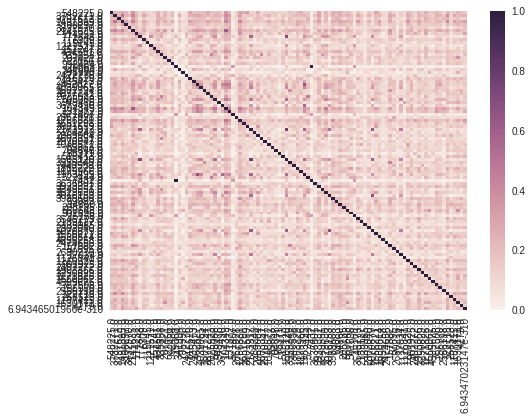

In [17]:
import seaborn as sns 
import matplotlib.pyplot as plt
ax = plt.axes()
a = sns.heatmap(resultDf, annot=False, ax=ax)
plt.show()

-----------------